In [1]:
!pip install geopandas
!pip install salem
!pip install netcdf4
!pip install rasterio
import numpy as np
import zipfile
import geopandas as gpd
import salem
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 104.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 113.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 KB 7.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 68.5 MB/s eta 0:00:00


#Cargar datos

In [2]:
#open nc
PISCOp= xr.open_dataset("/content/drive/MyDrive/TRABAJO TÉCNICAS 2/DATOS T[ECNICAS 2/Copy of PISCOp.nc",decode_times=False)
#rename coordinates in order to match with crop function
PISCOp=PISCOp.rename({"T":"time","X": "longitude", "Y": "latitude"})
PISCOp["time"]=pd.date_range("1981-01-01", freq='D',periods=13149)
#Climatologia mensual de PP
piscop_m=PISCOp.resample(time="1M", skipna=True).sum(dim="time")
piscop_m=piscop_m.Prec.groupby(piscop_m.time.dt.month).mean(dim="time")
piscop_m
#save
piscop_m.to_netcdf("pisco_clim_monthly.nc")
#select by month

In [4]:
wglc

<xarray.Dataset>
Dimensions:  (time: 12, lat: 252, lon: 180)
Coordinates:
  * lon      (lon) float64 -81.96 -81.88 -81.79 -81.71 ... -67.21 -67.12 -67.04
  * lat      (lat) float64 -18.96 -18.88 -18.79 -18.71 ... 1.792 1.875 1.958
  * time     (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    density  (time, lat, lon) float32 0.0 0.0 0.0 ... 0.01671 0.01764 0.01683
Attributes:
    Conventions:  CF-1.8
    title:        WWLLN Global Lightning Climatology, climatological mean (20...
    contact:      jed.kaplan@arve-research.com
    source_data:  WWLLN AE georeferenced stroke counts, corrected for detecti...
    node_offset:  1
    DOI:          https://doi.org/10.5281/zenodo.6007052

In [5]:
wglc = xr.open_dataset("/content/drive/MyDrive/TRABAJO TÉCNICAS 2/DATOS T[ECNICAS 2/WGLC/wglc_climatology_05m.nc")
wglc = wglc.where((-82 < wglc.lon) & 
                  (wglc.lon < -67) & 
                  (-19 < wglc.lat) & 
                  (wglc.lat < 2), drop=True)

wglc["time"]=np.array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
wglc=wglc.rename({"lon":"longitud","lat":"latitud"})

WG_1=wglc.density.isel(time=0)
WG_6=wglc.density.isel(time=5)
#save modified months and coordinates
wglc.to_netcdf("wglc_clim_modified.nc")

In [6]:
CC = xr.open_dataset("/content/drive/MyDrive/TRABAJO TÉCNICAS 2/DATOS T[ECNICAS 2/CC.nc")
CC=CC.rename({"z": "time"})

CC_1=CC.variable.isel(time=0)
CC_6=CC.variable.isel(time=5)
#save nc
CC.to_netcdf("CC_monthly.nc")

In [7]:
#shape regiones naturales
shdf = salem.read_shapefile("/content/drive/MyDrive/TRABAJO TÉCNICAS 2/DATOS T[ECNICAS 2/shps/areas naturales del peru/region natural_geogpsperu_JuanPabloSuyoPomalia.shp").\
to_crs({"init": "epsg:4326"})
#shape sudamerica
shp = salem.read_shapefile("/content/drive/MyDrive/TRABAJO TÉCNICAS 2/DATOS T[ECNICAS 2/shps/sudamerica/Sudamérica.shp").\
to_crs({"init": "epsg:4326"})

/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


#crop para precipitacion

In [12]:
piscop_m

<xarray.DataArray 'Prec' (month: 12, latitude: 198, longitude: 133)>
array([[[  0.       ,   0.       ,   0.       , ..., 250.02522  ,
         182.7587   , 178.41618  ],
        [  0.       ,   0.       ,   0.       , ..., 274.86935  ,
         214.97586  , 208.87346  ],
        [  0.       ,   0.       ,   0.       , ..., 311.66937  ,
         261.0767   , 238.50163  ],
        ...,
        [  0.       ,   0.       ,   0.       , ...,  99.78298  ,
          99.7469   , 100.636314 ],
        [  0.       ,   0.       ,   0.       , ..., 105.487114 ,
         105.49649  ,  99.21408  ],
        [  0.       ,   0.       ,   0.       , ...,  96.623215 ,
          89.158516 ,  83.22309  ]],

       [[  0.       ,   0.       ,   0.       , ..., 247.55894  ,
         199.23326  , 194.2985   ],
        [  0.       ,   0.       ,   0.       , ..., 266.94333  ,
         221.90775  , 230.80647  ],
        [  0.       ,   0.       ,   0.       , ..., 292.84875  ,
         249.47087  , 238.73138  ],
...
        [  0.       ,   0.       ,   0.       , ...,   1.8384433,
           1.9869035,   2.2168884],
        [  0.       ,   0.       ,   0.       , ...,   2.0083284,
           2.208728 ,   4.9719405],
        [  0.       ,   0.       ,   0.       , ...,   4.856501 ,
           5.5243435,   5.5275464]],

       [[  0.       ,   0.       ,   0.       , ..., 247.40994  ,
         398.2579   , 525.47864  ],
        [  0.       ,   0.       ,   0.       , ..., 278.8407   ,
         367.33994  , 424.12216  ],
        [  0.       ,   0.       ,   0.       , ..., 286.79596  ,
         304.91174  , 287.64905  ],
        ...,
        [  0.       ,   0.       ,   0.       , ...,  28.129019 ,
          22.419977 ,  23.805998 ],
        [  0.       ,   0.       ,   0.       , ...,  20.320295 ,
          20.136827 ,  26.310995 ],
        [  0.       ,   0.       ,   0.       , ...,  22.036446 ,
          24.80561  ,  29.898746 ]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:       Precipitation
    units:           mm/day
    colormap:        [null 16777215 16777215 16777215 [16777215 3] 14155730 [...
    colorscalename:  precip_colors
    maxncolor:       254
    ncolor:          254
    scale_min:       0.0
    CS:              0

In [10]:
PISCOp

<xarray.Dataset>
Dimensions:    (time: 13149, latitude: 198, longitude: 133)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2016-12-31
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
Data variables:
    Prec       (time, latitude, longitude) float32 ...

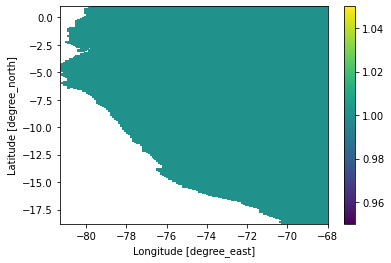

In [20]:
#crop 
to_mask = piscop_m.isel(month=0).copy()
to_mask = to_mask.to_numpy()
to_mask[to_mask > 0] = 1
to_mask[to_mask == 0] = np.nan
to_mask = xr.DataArray(to_mask, coords={"longitude":piscop_m.longitude, "latitude":piscop_m.latitude}, dims=["latitude","longitude"])
to_mask.plot()

In [23]:
#multiplicar 
l=piscop_m*to_mask
#xarray dataarray a dataset
PPM_wo=l.to_dataset(name="Prec")
#exportar a archivo nc
PPM_wo.to_netcdf("PP_wo.nc")
PP_1=PPM_wo.isel(month=0)
PP_6=PPM_wo.isel(month=5)

#Plot


<ipython-input-53-b51ac551a183>:131: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


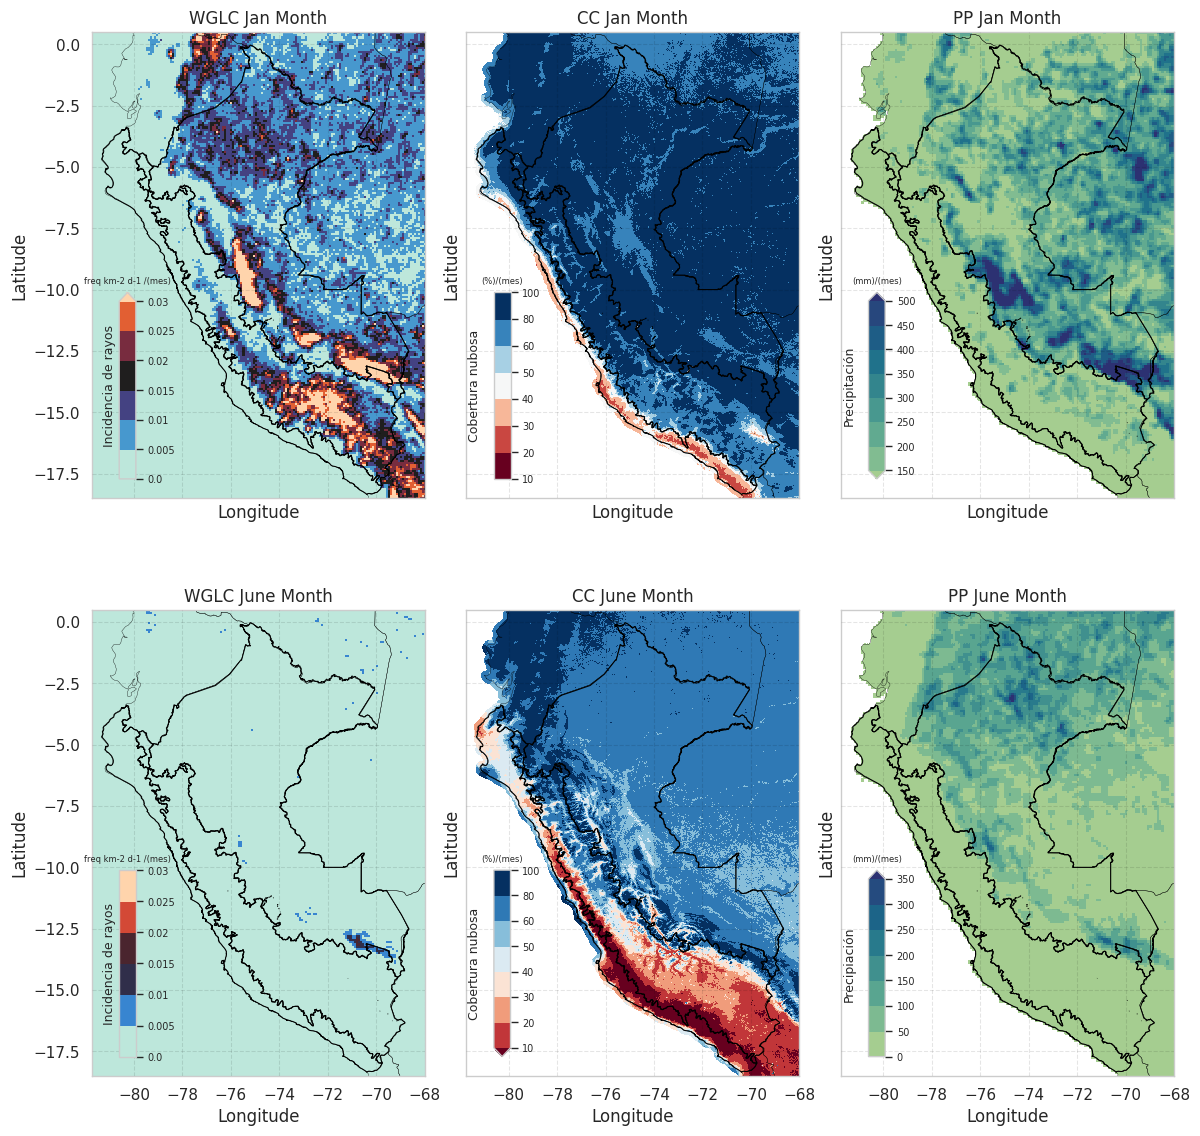

In [ ]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.25, rc={"lines.linewidth": 2})
fig, ((ax, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12, 12), dpi = 100, sharex=True, sharey=True)


#plot figure 1
ax.set_axisbelow(False)
im = wglc_wo.density.plot(ax = ax, levels = [0.000,0.005,0.010,0.015,0.020,0.025,0.030], 
                          cmap = "icefire", add_colorbar=False)
axin = inset_axes(ax, width='5%', 
                  height='40%', loc = 'lower left', 
                  bbox_to_anchor = (0.06, 0.025, 1 ,1), bbox_transform = ax.transAxes)
#localizando colorbar
cb = plt.colorbar(im, cax=axin, 
                  orientation = "vertical", 
                  aspect = 4, ticks = [0.000,0.005,0.010,0.015,0.020,0.025,0.030])
cb.ax.set_yticklabels([0.000,0.005,0.010,0.015,0.020,0.025,0.030], fontdict={"fontsize":7})
cb.ax.set_ylabel('Incidencia de rayos', labelpad=-52, fontsize=9)
cb.ax.set_title('freq km-2 d-1 /(mes)', fontsize = 6)
#shapes
shp.geometry.boundary.plot(ax = ax, edgecolor = "black", linewidth = .25)
shdf.geometry.boundary.plot(ax = ax, edgecolor = "black", linewidth = .75)
#plot features
ax.set_ylim(-18.5, 0.5)
ax.set_xlim(-81.75, -68)
ax.set_ylabel("Latitude")
ax.set_xlabel("Longitude")
ax.set_title("WGLC Jan Month")
ax.grid(True, linestyle='--', color = "black", alpha = 0.1)


#plot figure 2
ax2.set_axisbelow(False)
im = CC_1.plot(ax = ax2, levels = [10,20,30,50,40,60,80,100], cmap = "RdBu", add_colorbar=False)
axin = inset_axes(ax, width='5%', 
                  height='40%', loc = 'lower left', 
                  bbox_to_anchor = (0.06, 0.025, 1 ,1), bbox_transform = ax2.transAxes)
#colorbar
cb = plt.colorbar(im, cax=axin, 
                  orientation = "vertical", 
                  aspect = 4, ticks = [10,20,30,50,40,60,80,100])
cb.ax.set_yticklabels([10,20,30,50,40,60,80,100], fontdict={"fontsize":7})
cb.ax.set_ylabel('Cobertura nubosa', labelpad=-52, fontsize=9)
cb.ax.set_title('(%)/(mes)', fontsize = 6)
#shapes
shp.geometry.boundary.plot(ax = ax2, edgecolor = "black", linewidth = .25)
shdf.geometry.boundary.plot(ax = ax2, edgecolor = "black", linewidth = .75)
#plot features
ax2.set_ylim(-18.5, 0.5)
ax2.set_xlim(-81.75, -68)
ax2.set_ylabel("Latitude")
ax2.set_xlabel("Longitude")
ax2.set_title("CC Jan Month")
ax2.grid(True, linestyle='--', color = "black", alpha = 0.1)


#plot figure 3
ax3.set_axisbelow(False)
im = PP_1.Prec.plot(ax = ax3, levels = [150,200,250,300,350,400,450,500], cmap = "crest", add_colorbar=False)
axin = inset_axes(ax, width='5%', 
                  height='40%', loc = 'lower left', 
                  bbox_to_anchor = (0.06, 0.025, 1 ,1), bbox_transform = ax3.transAxes)
#colorbar
cb = plt.colorbar(im, cax=axin, 
                  orientation = "vertical", 
                  aspect = 4, ticks = [150,200,250,300,350,400,450,500])
cb.ax.set_yticklabels([150,200,250,300,350,400,450,500], fontdict={"fontsize":7})
cb.ax.set_ylabel('Precipitación', labelpad=-52, fontsize=9)
cb.ax.set_title('(mm)/(mes)', fontsize = 6)
#shapefiles
shp.geometry.boundary.plot(ax = ax3, edgecolor = "black", linewidth = .25)
shdf.geometry.boundary.plot(ax = ax3, edgecolor = "black", linewidth = .75)
#plot features
ax3.set_ylim(-18.5, 0.5)
ax3.set_xlim(-81.75, -68)
ax3.set_ylabel("Latitude")
ax3.set_xlabel("Longitude")
ax3.set_title("PP Jan Month")
ax3.grid(True, linestyle='--', color = "black", alpha = 0.1)


#Figure 4
ax4.set_axisbelow(False)
im = WG_6.plot(ax = ax4, levels = [0.000,0.005,0.010,0.015,0.020,0.025,0.030], 
               cmap = "icefire", add_colorbar=False)
axin = inset_axes(ax4, width='5%', 
                  height='40%', loc = 'lower left', 
                  bbox_to_anchor = (0.06, 0.025, 1 ,1), bbox_transform = ax4.transAxes)
#colorbar
cb = plt.colorbar(im, cax=axin, 
                  orientation = "vertical", aspect = 4, 
                  ticks = [0.000,0.005,0.010,0.015,0.020,0.025,0.030])
cb.ax.set_yticklabels([0.000,0.005,0.010,0.015,0.020,0.025,0.030], fontdict={"fontsize":7})
cb.ax.set_ylabel('Incidencia de rayos', labelpad=-52, fontsize=9)
cb.ax.set_title('freq km-2 d-1 /(mes)', fontsize = 6)
#shapefiles
shp.geometry.boundary.plot(ax = ax4, edgecolor = "black", linewidth = .25)
shdf.geometry.boundary.plot(ax = ax4, edgecolor = "black", linewidth = .75)
#plot features
ax4.set_ylim(-18.5, 0.5)
ax4.set_xlim(-81.75, -68)
ax4.set_ylabel("Latitude")
ax4.set_xlabel("Longitude")
ax4.set_title("WGLC June Month")
ax4.grid(True, linestyle='--', color = "black", alpha = 0.1)

#plot figure 5
ax5.set_axisbelow(False)
im = CC_6.plot(ax = ax5, levels = [10,20,30,50,40,60,80,100], cmap = "RdBu", add_colorbar=False)
axin = inset_axes(ax5, width='5%', height='40%', loc = 'lower left', bbox_to_anchor = (0.06, 0.025, 1 ,1), bbox_transform = ax5.transAxes)
#colorbar
cb = plt.colorbar(im, cax=axin, orientation = "vertical", aspect = 4, ticks = [10,20,30,50,40,60,80,100])
cb.ax.set_yticklabels([10,20,30,50,40,60,80,100], fontdict={"fontsize":7})
cb.ax.set_ylabel('Cobertura nubosa', labelpad=-52, fontsize=9)
cb.ax.set_title('(%)/(mes)', fontsize = 6)
#shapes
shp.geometry.boundary.plot(ax = ax5, edgecolor = "black", linewidth = .25)
shdf.geometry.boundary.plot(ax = ax5, edgecolor = "black", linewidth = .75)
#plot features
ax5.set_ylim(-18.5, 0.5)
ax5.set_xlim(-81.75, -68)
ax5.set_ylabel("Latitude")
ax5.set_xlabel("Longitude")
ax5.set_title("CC June Month")
ax5.grid(True, linestyle='--', color = "black", alpha = 0.1)


#plot figure 6
ax6.set_axisbelow(False)
im = PP_6.Prec.plot(ax = ax6, levels = [0,50,100,150,200,250,300,350], cmap = "crest", add_colorbar=False)
#localizando colorbar
axin = inset_axes(ax6, width='5%', height='40%', loc = 'lower left', bbox_to_anchor = (0.06, 0.025, 1 ,1), bbox_transform = ax6.transAxes)
#colorbar
cb = plt.colorbar(im, cax=axin, orientation = "vertical", aspect = 4, ticks = [0,50,100,150,200,250,300,350])
cb.ax.set_yticklabels([0,50,100,150,200,250,300,350], fontdict={"fontsize":7})
cb.ax.set_ylabel('Precipiación', labelpad=-52, fontsize=9)
cb.ax.set_title('(mm)/(mes)', fontsize = 6)
#shapes
shp.geometry.boundary.plot(ax = ax6, edgecolor = "black", linewidth = .25)
shdf.geometry.boundary.plot(ax = ax6, edgecolor = "black", linewidth = .75)
#plot features
ax6.set_ylim(-18.5, 0.5)
ax6.set_xlim(-81.75, -68)
ax6.set_ylabel("Latitude")
ax6.set_xlabel("Longitude")
ax6.set_title("PP June Month")
ax6.grid(True, linestyle='--', color = "black", alpha = 0.1)
plt.tight_layout()
#save plot
plt.savefig("wglc_cc_pp_M_1_6.png")
plt.show()